In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV


In [2]:
df=pd.read_excel("C:\\heart_disease.xlsx",header=0,sheet_name=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [3]:
df.shape

(908, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [6]:
df[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
764,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2
765,58,Male,non-anginal,150,219,False,st-t abnormality,118,True,0.0,downsloping,normal,2


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    object 
 2   cp        907 non-null    object 
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    bool   
 6   restecg   907 non-null    object 
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    object 
 9   oldpeak   845 non-null    float64
 10  slope     907 non-null    object 
 11  thal      907 non-null    object 
 12  num       907 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 93.0+ KB


In [9]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    object 
 2   cp        907 non-null    object 
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    bool   
 6   restecg   907 non-null    object 
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    object 
 9   oldpeak   845 non-null    float64
 10  slope     907 non-null    object 
 11  thal      907 non-null    object 
 12  num       907 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 93.0+ KB


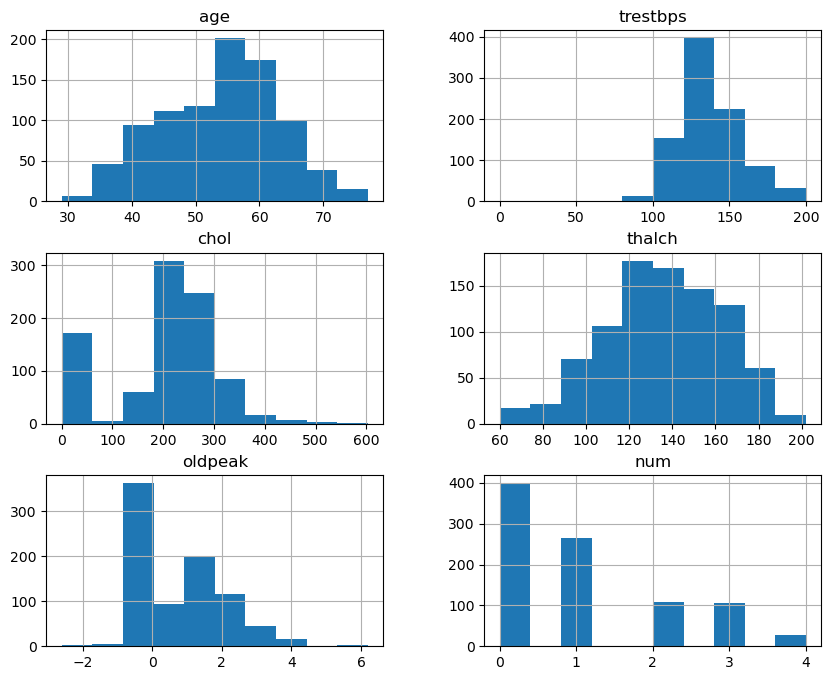

In [11]:
df.hist(figsize=(10, 8))
plt.show()

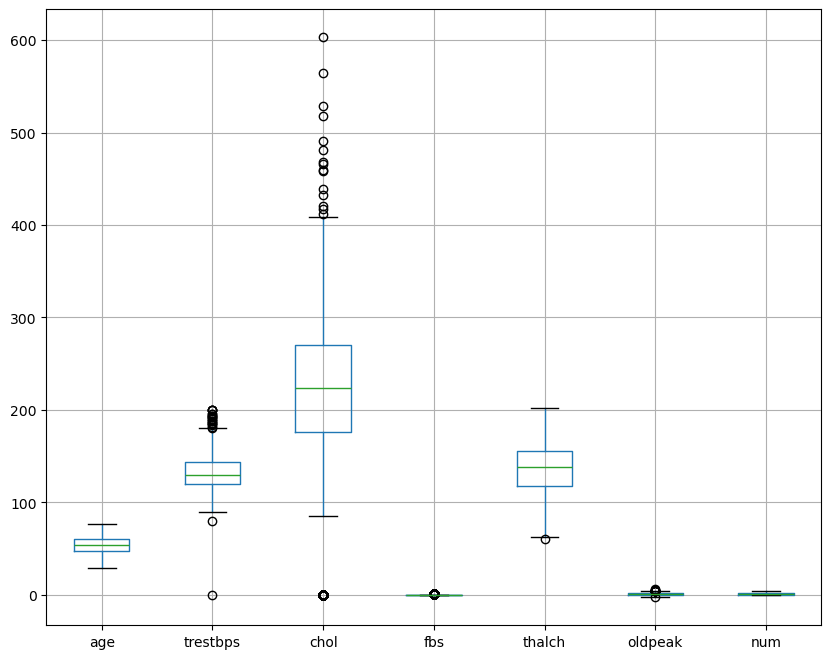

In [12]:
df.boxplot(figsize=(10, 8))
plt.show()

In [13]:
df.corr()

C:\Users\priyadarsani\AppData\Local\Temp\ipykernel_21188\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,trestbps,chol,fbs,thalch,oldpeak,num
age,1.000000,0.253709,-0.100059,0.177004,-0.327868,0.243280,0.326227
trestbps,0.253709,1.000000,0.117392,0.112124,-0.132841,0.168160,0.136581
chol,-0.100059,0.117392,1.000000,-0.113651,0.198074,0.030052,-0.239065
fbs,0.177004,0.112124,-0.113651,1.000000,-0.065827,0.023915,0.156839
thalch,-0.327868,-0.132841,0.198074,-0.065827,1.000000,-0.140423,-0.322632
oldpeak,0.243280,0.168160,0.030052,0.023915,-0.140423,1.000000,0.438834
num,0.326227,0.136581,-0.239065,0.156839,-0.322632,0.438834,1.000000


C:\Users\priyadarsani\AppData\Local\Temp\ipykernel_21188\2818592519.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


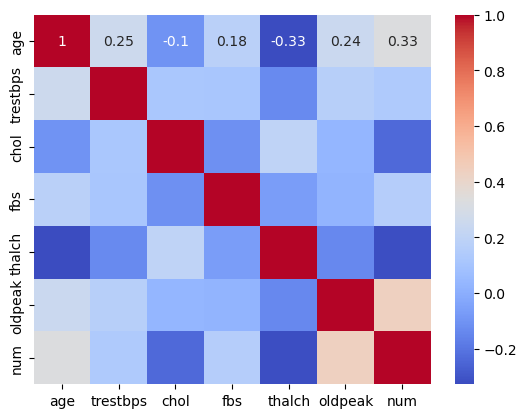

In [14]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    object 
 2   cp        907 non-null    object 
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    bool   
 6   restecg   907 non-null    object 
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    object 
 9   oldpeak   845 non-null    float64
 10  slope     907 non-null    object 
 11  thal      907 non-null    object 
 12  num       907 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 93.0+ KB


In [16]:
label=LabelEncoder()
df['sex'] = label.fit_transform(df['sex'])
df['cp'] = label.fit_transform(df['cp'])
df['restecg'] = label.fit_transform(df['restecg'])
df['slope'] = label.fit_transform(df['slope'])
df['thal'] = label.fit_transform(df['thal'])

df['exang'] = df['exang'].astype(bool).replace({True: 1, False: 0})
print(df['exang'].unique())
df['fbs']=label.fit_transform(df['fbs'])


[0 1]


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    int64  
 1   sex       907 non-null    int32  
 2   cp        907 non-null    int32  
 3   trestbps  907 non-null    int64  
 4   chol      907 non-null    int64  
 5   fbs       907 non-null    int64  
 6   restecg   907 non-null    int32  
 7   thalch    907 non-null    int64  
 8   exang     907 non-null    int64  
 9   oldpeak   845 non-null    float64
 10  slope     907 non-null    int32  
 11  thal      907 non-null    int32  
 12  num       907 non-null    int64  
dtypes: float64(1), int32(5), int64(7)
memory usage: 81.5 KB


In [46]:
scaler = StandardScaler()
df['age'] = scaler.fit_transform(df[['age']])
df['trestbps'] = scaler.fit_transform(df[['trestbps']])
df['chol'] = scaler.fit_transform(df[['chol']])
df['oldpeak'] = scaler.fit_transform(df[['oldpeak']])
df['thalch'] = scaler.fit_transform(df[['thalch']])



In [47]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006097,1,3,0.568184,0.281318,1,0,0.523285,0,1.333786e+00,0,0,0
1,-1.396447,1,1,0.077848,0.013691,0,1,-0.148399,0,-8.454601e-01,1,0,0
2,0.350858,1,0,0.323016,-0.084439,0,1,0.448654,0,-4.664607e-01,1,0,0
3,-0.195175,1,3,-0.755723,-0.137964,0,0,2.015918,0,-8.454601e-01,1,0,0
4,0.350858,1,0,-1.147992,-0.004151,0,1,-0.372294,1,5.757875e-01,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.085969,1,0,-0.412488,-1.797250,0,1,-0.596189,0,5.757875e-01,2,2,4
904,0.896890,1,0,1.597890,-0.280698,0,2,-0.596189,1,1.997035e+00,1,2,4
905,0.241651,1,2,1.794024,-1.797250,0,0,-0.484242,1,1.523286e+00,0,1,4
906,0.241651,1,2,0.519151,0.058296,1,2,-1.155926,1,-2.382063e-18,0,0,4


In [48]:
# Handle missing values using imputation
imputer = SimpleImputer(strategy='mean')
df['oldpeak'] = imputer.fit_transform(df[['oldpeak']])


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       907 non-null    float64
 1   sex       907 non-null    int32  
 2   cp        907 non-null    int32  
 3   trestbps  907 non-null    float64
 4   chol      907 non-null    float64
 5   fbs       907 non-null    int64  
 6   restecg   907 non-null    int32  
 7   thalch    907 non-null    float64
 8   exang     907 non-null    int64  
 9   oldpeak   907 non-null    float64
 10  slope     907 non-null    int32  
 11  thal      907 non-null    int32  
 12  num       907 non-null    int64  
dtypes: float64(5), int32(5), int64(3)
memory usage: 81.5 KB


In [50]:
x= df.drop(['num'], axis=1)
y=df['num']

In [51]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,1.006097,1,3,0.568184,0.281318,1,0,0.523285,0,1.333786e+00,0,0
1,-1.396447,1,1,0.077848,0.013691,0,1,-0.148399,0,-8.454601e-01,1,0
2,0.350858,1,0,0.323016,-0.084439,0,1,0.448654,0,-4.664607e-01,1,0
3,-0.195175,1,3,-0.755723,-0.137964,0,0,2.015918,0,-8.454601e-01,1,0
4,0.350858,1,0,-1.147992,-0.004151,0,1,-0.372294,1,5.757875e-01,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,-0.085969,1,0,-0.412488,-1.797250,0,1,-0.596189,0,5.757875e-01,2,2
904,0.896890,1,0,1.597890,-0.280698,0,2,-0.596189,1,1.997035e+00,1,2
905,0.241651,1,2,1.794024,-1.797250,0,0,-0.484242,1,1.523286e+00,0,1
906,0.241651,1,2,0.519151,0.058296,1,2,-1.155926,1,-2.382063e-18,0,0


In [52]:
y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 907, dtype: int64

In [53]:
# y[y.duplicated(keep=False)]
# y = y[:-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 907, dtype: int64

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [55]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725 entries, 685 to 806
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       725 non-null    float64
 1   sex       725 non-null    int32  
 2   cp        725 non-null    int32  
 3   trestbps  725 non-null    float64
 4   chol      725 non-null    float64
 5   fbs       725 non-null    int64  
 6   restecg   725 non-null    int32  
 7   thalch    725 non-null    float64
 8   exang     725 non-null    int64  
 9   oldpeak   725 non-null    float64
 10  slope     725 non-null    int32  
 11  thal      725 non-null    int32  
dtypes: float64(5), int32(5), int64(2)
memory usage: 59.5 KB


In [56]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
685,-1.068827,1,0,-1.049924,0.789809,0,0,0.635233,0,-0.845460,2,1
244,-0.304382,1,0,-0.265387,-1.797250,0,1,-1.081295,0,-0.845460,0,0
670,-1.287240,1,0,0.126882,1.012831,0,1,-0.409610,1,0.860037,1,0
705,0.350858,1,0,1.303688,-1.797250,0,1,-1.417137,1,1.049537,1,2
490,0.787684,1,0,0.323016,0.049375,0,0,0.075496,1,0.954787,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
140,0.569271,1,1,0.323016,0.174267,0,1,1.045707,1,-0.845460,2,1
500,0.569271,1,0,2.186293,-1.797250,1,0,-0.596189,1,-0.845460,0,2
814,-0.304382,1,0,0.323016,0.861176,0,1,-0.521557,1,3.134033,1,2
421,0.896890,1,0,-1.147992,-1.797250,0,1,-0.596189,1,-0.371711,1,1


In [57]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
y_pred=model.predict(x_test)


In [59]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
# roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
roc_auc = roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr')


In [60]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)


Accuracy: 0.42857142857142855
Precision: 0.4359413855002625
Recall: 0.42857142857142855
F1-score: 0.4306417206836156
ROC-AUC: 0.5656265355549394


In [61]:
parma_grid={
    'max_depth':[3,5,7,10],
    'min_samples_split':[2,5,10],
    'criterion':['gini','entropy']
}


In [62]:
grid_search=GridSearchCV(model,parma_grid,cv=5,scoring='accuracy')

In [63]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [64]:
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [65]:
print("Best score:", grid_search.best_score_)

Best score: 0.5517241379310345


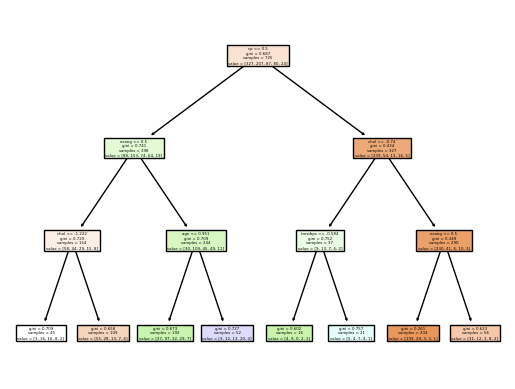

In [66]:
from sklearn.tree import plot_tree
best_model = grid_search.best_estimator_
plot_tree(best_model, feature_names=x.columns, filled=True)
plt.show()

In [67]:
'''1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
A.
1. max_depth: How deep the tree can grow. Too deep and it might overfit (memorize the training data).

2. min_samples_split: How many samples are needed to split a node. Too few and it might overfit.

3. min_samples_leaf: How many samples are needed to be at a leaf node. Too few and it might overfit.

4. max_features: How many features to consider at each split. Too many and it might overfit.

5. criterion: How to measure the quality of a split. "Gini" and "entropy" are common choices.

6. splitter: How to choose the split at each node. "Best" or "random" are options.

7. max_leaf_nodes: How many leaf nodes are allowed. Too many and it might overfit.

8. min_impurity_decrease: How much impurity must decrease to make a split. Too little and it might overfit.
'''

'1. What are some common hyperparameters of decision tree models, and how do they affect the model\'s performance?\nA.\n1. max_depth: How deep the tree can grow. Too deep and it might overfit (memorize the training data).\n\n2. min_samples_split: How many samples are needed to split a node. Too few and it might overfit.\n\n3. min_samples_leaf: How many samples are needed to be at a leaf node. Too few and it might overfit.\n\n4. max_features: How many features to consider at each split. Too many and it might overfit.\n\n5. criterion: How to measure the quality of a split. "Gini" and "entropy" are common choices.\n\n6. splitter: How to choose the split at each node. "Best" or "random" are options.\n\n7. max_leaf_nodes: How many leaf nodes are allowed. Too many and it might overfit.\n\n8. min_impurity_decrease: How much impurity must decrease to make a split. Too little and it might overfit.\n'

In [68]:
'''1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Label Encoding

Label encoding assigns a unique integer value to each category in a categorical column. For example:

| Category | Label Encoded |
| --- | --- |
| Red | 0 |
| Blue | 1 |
| Green | 2 |

In label encoding, the integer values have a natural order, which may not be desirable if the categories don't have a natural order.

One-hot Encoding

One-hot encoding creates a new binary column for each category in a categorical column. For example:

| Category | Red | Blue | Green |
| --- | --- | --- | --- |
| Red | 1 | 0 | 0 |
| Blue | 0 | 1 | 0 |
| Green | 0 | 0 | 1 |

In one-hot encoding, each category is represented by a unique binary vector, which eliminates the issue of natural order.
'''

"1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?\nLabel Encoding\n\nLabel encoding assigns a unique integer value to each category in a categorical column. For example:\n\n| Category | Label Encoded |\n| --- | --- |\n| Red | 0 |\n| Blue | 1 |\n| Green | 2 |\n\nIn label encoding, the integer values have a natural order, which may not be desirable if the categories don't have a natural order.\n\nOne-hot Encoding\n\nOne-hot encoding creates a new binary column for each category in a categorical column. For example:\n\n| Category | Red | Blue | Green |\n| --- | --- | --- | --- |\n| Red | 1 | 0 | 0 |\n| Blue | 0 | 1 | 0 |\n| Green | 0 | 0 | 1 |\n\nIn one-hot encoding, each category is represented by a unique binary vector, which eliminates the issue of natural order.\n"